In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def saturationFraction(K, n, x):
    def binomial(n, m):
        return math.comb(n, m)
    
    if isinstance(x, np.ndarray):
        result = []
        for x_i in x:
            numerator = sum(binomial(n, m) * m * (x_i ** m) / (K ** (m * (n - m) / 2)) for m in range(n + 1))
            denominator = sum(binomial(n, m) * n * (x_i ** m) / (K ** (m * (n - m) / 2)) for m in range(n + 1))
            result.append(numerator / denominator)
        return result
    else:
        numerator = sum(binomial(n, m) * m * (x ** m) / (K ** (m * (n - m))) for m in range(n + 1))
        denominator = sum(binomial(n, m) * n * (x ** m) / (K ** (m * (n - m))) for m in range(n + 1))
        return numerator / denominator
    
def HillFunction(nH, x):
    return x**nH / (1 + x**nH)

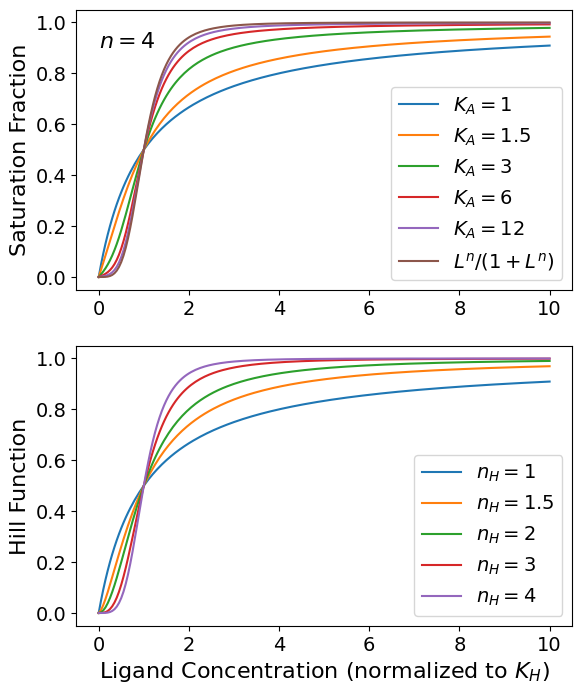

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(8)

n = 4
x = np.linspace(0, 10, 201)

K = 1
y = saturationFraction(K, n, x)
ax1.plot(x, y, label=r"$K_A = 1$")

K = 1.5
y = saturationFraction(K, n, x)
ax1.plot(x, y, label=r"$K_A = 1.5$")

K = 3
y = saturationFraction(K, n, x)
ax1.plot(x, y, label=r"$K_A = 3$")

K = 6
y = saturationFraction(K, n, x)
ax1.plot(x, y, label=r"$K_A = 6$")

K = 12
y = saturationFraction(K, n, x)
ax1.plot(x, y, label=r"$K_A = 12$")

ax1.plot(x, x**n/(1 + x**n), label=r"$L^n / (1 + L^n)$")

ax1.text(0, 0.9, r"$n=4$", fontsize=16)
ax1.set_ylabel("Saturation Fraction", fontsize=16)
ax1.legend(fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)



nH = 1
ax2.plot(x, HillFunction(nH, x), label=r"$n_H = 1$")

nH = 1.5
ax2.plot(x, HillFunction(nH, x), label=r"$n_H = 1.5$")

nH = 2
ax2.plot(x, HillFunction(nH, x), label=r"$n_H = 2$")

nH = 3
ax2.plot(x, HillFunction(nH, x), label=r"$n_H = 3$")

nH = 4
ax2.plot(x, HillFunction(nH, x), label=r"$n_H = 4$")

ax2.set_xlabel(r"Ligand Concentration (normalized to $K_H$)", fontsize=16)
ax2.set_ylabel(r"Hill Function", fontsize=16)
ax2.legend(fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

fig.savefig("PDFs/fig-24.01.pdf")
fig.savefig("PNGs/fig-24.01.png")